# Laboratorio 02

1. Generar dos distribuciones de probabilidad centradas en 5.0,  7.5 con desviación estandar de 2.5 y 1.5 respectivamente. Realizar un gráfico de ambas distribuciones de probabilidad. 

  a). Emplear el objeto [stats.norm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) y el metodo *Probability density function* (pdf)

  b) Realizar un gráfico de ambas distribuciones

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


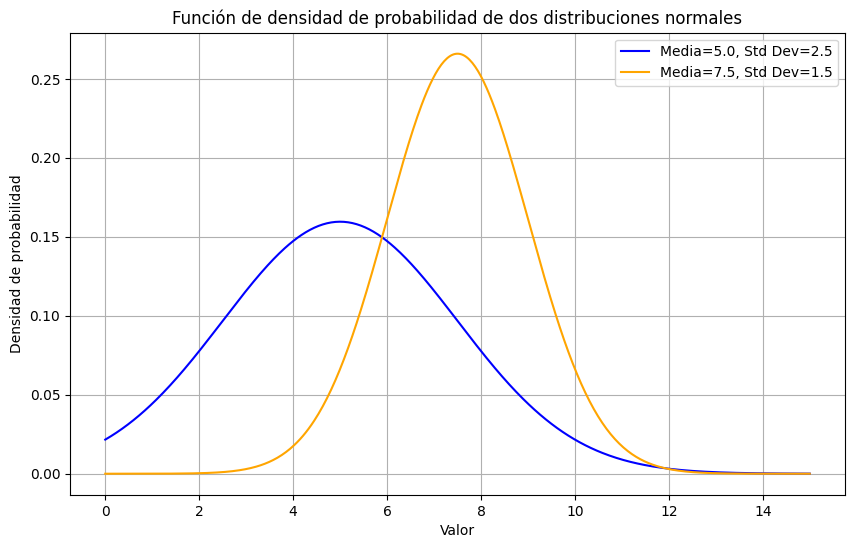

In [2]:
mean1, std_dev1 = 5.0, 2.5
mean2, std_dev2 = 7.5, 1.5

x_values = np.linspace(0, 15, 500)

pdf1 = norm.pdf(x_values, mean1, std_dev1)
pdf2 = norm.pdf(x_values, mean2, std_dev2)

plt.figure(figsize=(10, 6))
plt.plot(x_values, pdf1, label="Media=5.0, Std Dev=2.5", color="blue")
plt.plot(x_values, pdf2, label="Media=7.5, Std Dev=1.5", color="orange")
plt.title("Función de densidad de probabilidad de dos distribuciones normales")
plt.xlabel("Valor")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.grid(True)
plt.show()

2.  ¿Qué frontera analítica puede separar los datos?. Determine una expresión analítica en este caso.

Una frontera analítica se puede encontrar en el punto en $x$ que genera una línea vertical tal que la distribución centrada en 5.0 se iguala a la distribución centrada en 7.5. Analíticamente se conoce la expresión para la función pdf:
$$
f(x;\mu,\sigma)=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

Para encontrar ese punto en x se igualan las funciones:
$$
f(x;5,2.5)=f(x;7.5,1.5)
$$
Que queda como:
$$
\frac{1}{2.5 \sqrt{2 \pi}} e^{-\frac{(x - 5.0)^2}{2 \times (2.5)^2}} = \frac{1}{1.5 \sqrt{2 \pi}} e^{-\frac{(x - 7.5)^2}{2 \times (1.5)^2}}
$$
De aquí se despeja $x$. A continuación se escribe un pequeño programa que lo resuelve:



In [3]:
from sympy import symbols, Eq, solve, exp, pi

x = symbols('x')

pdf1_expr = (1 / (std_dev1 * (2 * pi)**0.5)) * exp(-((x - mean1)**2) / (2 * std_dev1**2))
pdf2_expr = (1 / (std_dev2 * (2 * pi)**0.5)) * exp(-((x - mean2)**2) / (2 * std_dev2**2))

equation = Eq(pdf1_expr, pdf2_expr)

solution = solve(equation, x)

print("Valores de x en los que se igualan las dos funciones:", solution)

Valores de x en los que se igualan las dos funciones: [5.89213209759395, 11.9203679024060]


En particular el que nos interesa es el primero de esos dos.

### Modelo de *machine learning*

3. Empleando el metodo *Random variates*(rvs), genere 100 muestas aleatorias para cada distribución, estos seran los datos de entrenamiento

In [4]:
import pandas as pd

mean1, std_dev1 = 5.0, 2.5
mean2, std_dev2 = 7.5, 1.5

samples_dist1 = norm.rvs(loc=mean1, scale=std_dev1, size=100)
samples_dist2 = norm.rvs(loc=mean2, scale=std_dev2, size=100)

samples_dist1[:10], samples_dist2[:10]

(array([2.17851461, 6.94863215, 3.0621176 , 3.75885154, 6.92230695,
        5.81484935, 4.67915596, 3.16103536, 5.74368668, 6.40293803]),
 array([ 8.02312863,  8.79366155, 10.16333164,  6.99431615,  5.71751375,
         7.73117702,  7.10381951,  8.68384849,  7.77705172,  9.29761102]))

4. Realice un gráfico en el que pueda superponer ambas distribuciones, estas 200 muestas serán las caracteristicas (*features*) de nuestro data frame, para cada característica tendremos una etiqueta(*labels*) correspondiente a  0 ó 1. 

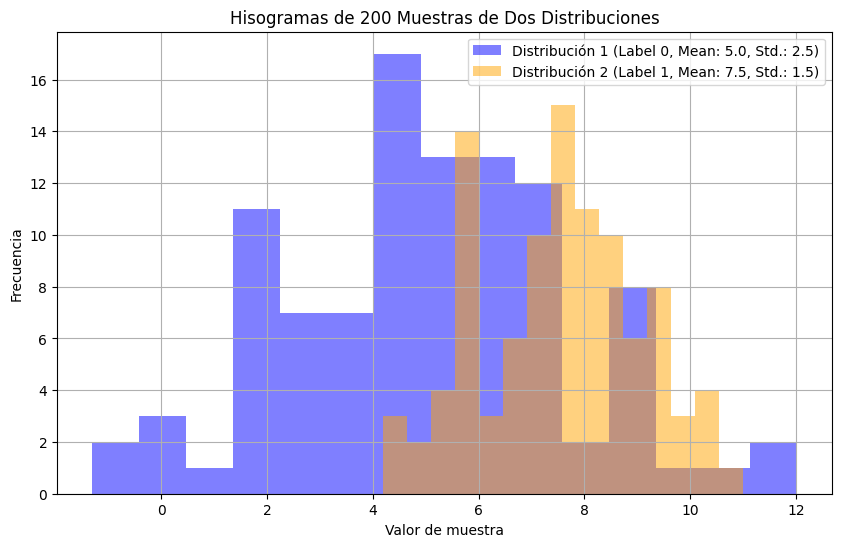

In [5]:
labels = np.concatenate([np.zeros(100), np.ones(100)])

all_samples = np.concatenate([samples_dist1, samples_dist2])

plt.figure(figsize=(10, 6))
plt.hist(samples_dist1, bins=15, alpha=0.5, label="Distribución 1 (Label 0, Mean: 5.0, Std.: 2.5)", color="blue")
plt.hist(samples_dist2, bins=15, alpha=0.5, label="Distribución 2 (Label 1, Mean: 7.5, Std.: 1.5)", color="orange")
plt.xlabel("Valor de muestra")
plt.ylabel("Frecuencia")
plt.title("Hisogramas de 200 Muestras de Dos Distribuciones")
plt.legend()
plt.grid(True)
plt.show()

5. Con los datos anteriores construya un DataFrame con los *features* y *labels* de la siguiente forma:


 |Y(*labels*)         | X_1(*feature*)       |
 |----------|----------|
 |$Y^{1}$ | $X_1^{1}$|
 |$Y^{2}$ | $X_1^{2}$|
 |.         | .        |
 |.         | .        |
 |.         | .        |
 |$Y^{m}$ | $X_1^{m}$  |

- Se sugiere emplear las claves Y, X para los labels y features respectivamente.
- $Y^{1},Y^{2}... Y^{m} $ son los  label de entrenamiento.
- $X_1^{1},X_1^{2}... X_1^{m} $ es el conjunto de datos de entrenamiento asociado a la característica 1 en el entrenamiento m. 
- Este dataframe será el dataset de entrenamiento, para los datos de test construiremos 50 variables aleatorias.

In [6]:
df_train = pd.DataFrame({
    'Y': labels,
    'X_1': all_samples
})

df_train

,Y,X_1
0,0.0,2.178515
1,0.0,6.948632
2,0.0,3.062118
3,0.0,3.758852
4,0.0,6.922307
...,...,...
195,1.0,7.877839
196,1.0,7.314797
197,1.0,7.747257
198,1.0,7.411194


6. Construye un segundo data frame con 50 datos de test, asociados a las   muestras de  las dos distribuciones, estos serán los datos de test empleados para validar los algoritmos de clasificación df_test con claves  Y, X_1.

In [7]:
test_samples_dist1 = norm.rvs(loc=mean1, scale=std_dev1, size=25)
test_samples_dist2 = norm.rvs(loc=mean2, scale=std_dev2, size=25)

test_labels = np.concatenate([np.zeros(25), np.ones(25)])
test_samples = np.concatenate([test_samples_dist1, test_samples_dist2])

df_test = pd.DataFrame({
    'Y': test_labels,
    'X_1': test_samples
})

### Modelo de machining learning 
7. Por ahora, emplearemos  clasificadores bajo un modelo de caja negra. La forma para implementar el modelo es la siguiente:
  - Definir el modelo y realizar el fit:
  ```
    clf = LinearRegression()
    clf.fit(X_train, Y_train)
  ```
  - Determinar el score de los datos de entrenamiento 
 
  ```
  score = clf.score(X_train, Y_train)
  ```
  - Determinar el score para los datos de test, ¿que puede concluir mirando los scores?

  Nota: 
  Emplear los siguientes clasificadores de machine learning y determinar los score para cada modelo. 
  
  ```
    - DecisionTreeClassifier(max_depth=3),
    - SVC(kernel="linear", C=0.025)
  ```

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

X_train = df_train[['X_1']]
Y_train = df_train['Y']
X_test = df_test[['X_1']]
Y_test = df_test['Y']

classifiers = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier(max_depth=3),
    'Support Vector Classifier': SVC(kernel="linear", C=0.025)
}

scores = {}
for name, clf in classifiers.items():
    clf.fit(X_train, Y_train)
    train_score = clf.score(X_train, Y_train)
    test_score = clf.score(X_test, Y_test)
    scores[name] = {'Puntaje de entrenamiento': train_score, 'Puntaje de test': test_score}
    print(f"{name} - Puntaje de entrenamiento: {train_score}, Puntaje de test: {test_score}")

Linear Regression - Puntaje de entrenamiento: 0.24928752978632618, Puntaje de test: 0.3316874748015626
Decision Tree Classifier - Puntaje de entrenamiento: 0.785, Puntaje de test: 0.7
Support Vector Classifier - Puntaje de entrenamiento: 0.72, Puntaje de test: 0.78


Los clasificadores de Decision Tree y SVC parecen ser los mejores modelos para esta tarea, ya que tiene una buena generalización y tienen scores altos. Sin embargo, el clasificador de Decistion Tree obtiene un puntaje ligeramente más alto, lo que lo hace una opción preferible en este caso. Por otro lado, la regresión lineal muestra un desempeño insuficiente, por lo que no es recomendable para esta tarea de clasificación.

8. Existen librerias que pueden optmizar los hyperparametros de cualquier modelo:   [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) prueba a implementar las siguientes lineas de código con el siguiente modelo:

```
from sklearn.model_selection import GridSearchCV

  param_grid = { 
    'max_depth' : [3,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

  CV_clf = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 10)
  CV_clf.fit(x_train, y_train)
```


Solución:

Se decide aplicar GridSearchCV sobre el DecisionTreeClassifier porque es el modelo con mayor puntaje en el conjunto de entrenamiento.

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier()

param_grid = { 
    'max_depth' : [3, 4, 5, 6, 7, 8],
    'criterion' : ['gini', 'entropy']
}

CV_clf = GridSearchCV(estimator=clf, param_grid=param_grid, cv=10)

CV_clf.fit(X_train, Y_train)

best_params = CV_clf.best_params_
best_score = CV_clf.best_score_

print("Mejores parámetros:", best_params)
print("Mejor puntaje de cross-validation:", best_score)

Mejores parámetros: {'criterion': 'entropy', 'max_depth': 7}
Mejor puntaje de cross-validation: 0.7150000000000001


9. En los algoritmos de *machining learning* es de suma importancia conocer las curvas de aprendizaje para decidir si el algoritmo funciona de manera optima, emplea las siguiente lineas de código para mostrar las curvas de aprendizaje de la regresion lineal. 

```
title = "Learning Curves"
plot_learning_curve(
    regr, title, Xtr_, ytr_,  ylim=(0.5, 1.01),  n_jobs=4
)
```

Solución:

Se usa la función `learning_curve` de scikit-learn, que contiene la lógica de entrenar el modelo que se le pasa para retornar los valores de la curva de entrenamiento. Este entrenamiento lo hace con los diferentes porcentajes que se le pasan a través de `train_sizes`. Al iterar sobre estos train_sizes, escoge aleatoriamente la cantidad de muestras del dataset del tamaño de `train_size` por el que va, y con estas muestras hace varios entrenamientos usando el método cross-validation.

Al final esta función retorna los valores de número de muestras usadas y los puntajes de entrenamiento y validación de cross-validation para cada uno de estos números de muestras, que se promedia todo para hacer las curvas de entrenamiento.

<module 'matplotlib.pyplot' from '/Users/camilogomez/anaconda3/envs/huggingface-experiments/lib/python3.11/site-packages/matplotlib/pyplot.py'>

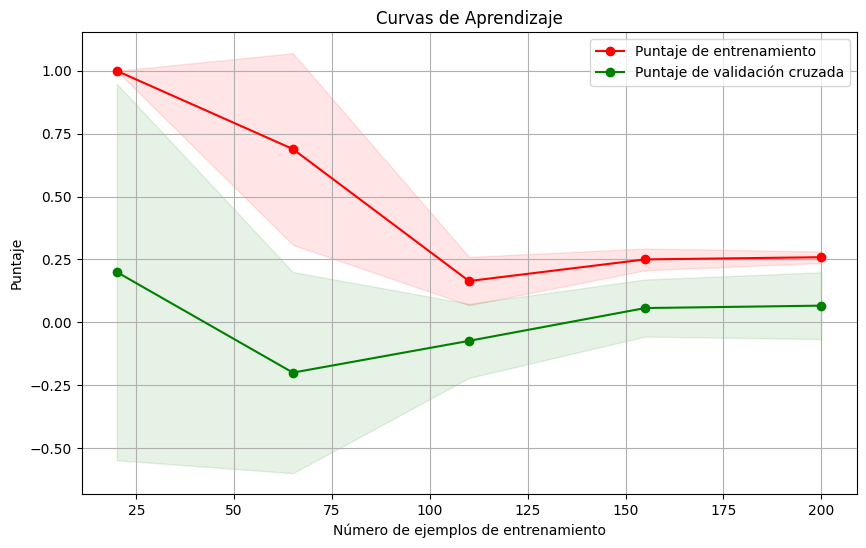

In [10]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(
    estimator, title, X, y, ylim=None, cv=None, n_jobs=None,
    train_sizes=np.linspace(.1, 1.0, 5)
):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Número de ejemplos de entrenamiento")
    plt.ylabel("Puntaje")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Puntaje de entrenamiento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Puntaje de validación cruzada")

    plt.legend(loc="best")
    return plt

regr = LinearRegression()
title = "Curvas de Aprendizaje"
plot_learning_curve(
    regr, title, np.concatenate((X_train, X_test)), 
    np.concatenate((Y_train, Y_test)), ylim=None, n_jobs=1
)

Como se puede ver, hay alta varianza al principio pero al final la varianza se acerca a cero y se observa que este tipo de modelo es malo para generalizar ante estos datos.

10. Pruea a construir curvas de aprendizaje para los siguientes valores en las distribuciones(emplea una regresion lineal):
  - Datos de entrenamiento 30. media1=7.5, media2=10, desv1=1, desv1=1
  - Datos de entrenamiento 100. media1=7.5, media2=10, desv1=1, desv1=1
  - Datos de entrenamiento 200. media1=7.5, media2=7.0, desv1 = 2, desv1 = 2  
  - Datos de entrenamiento 200. media1=7.5, media2=7.0, desv1 = 0.5, desv1 = 0.5  
  -¿Qué puede concluir? de cada prueba.


Nota: Busca siempre la manera de construir tus codigos de forma estructurada  de tal forma que puedar variar parametros con facilidad.

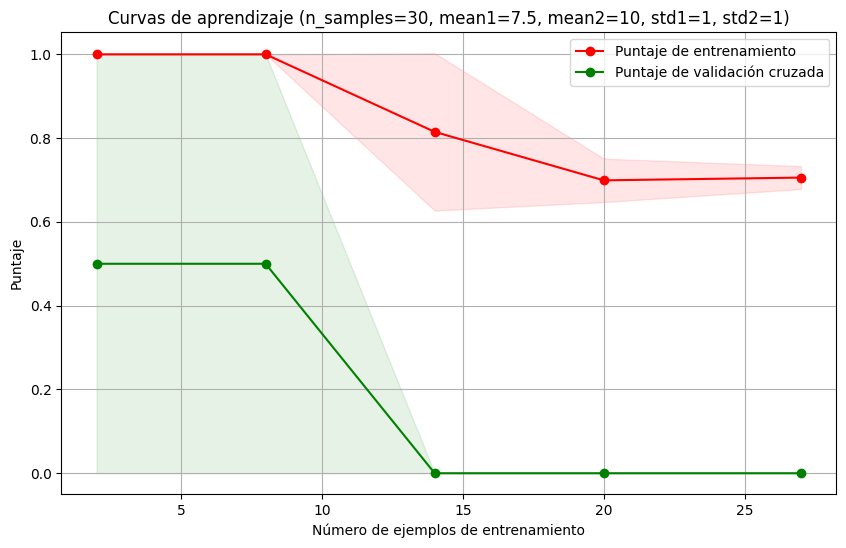

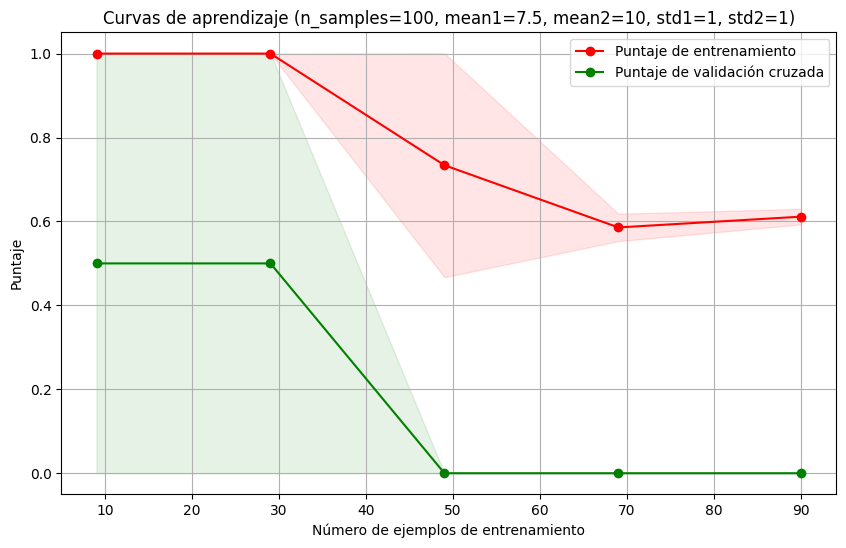

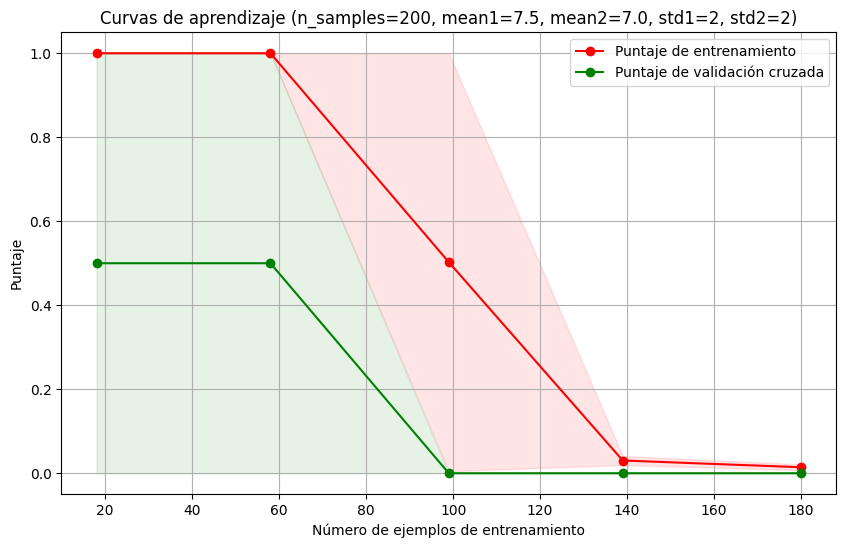

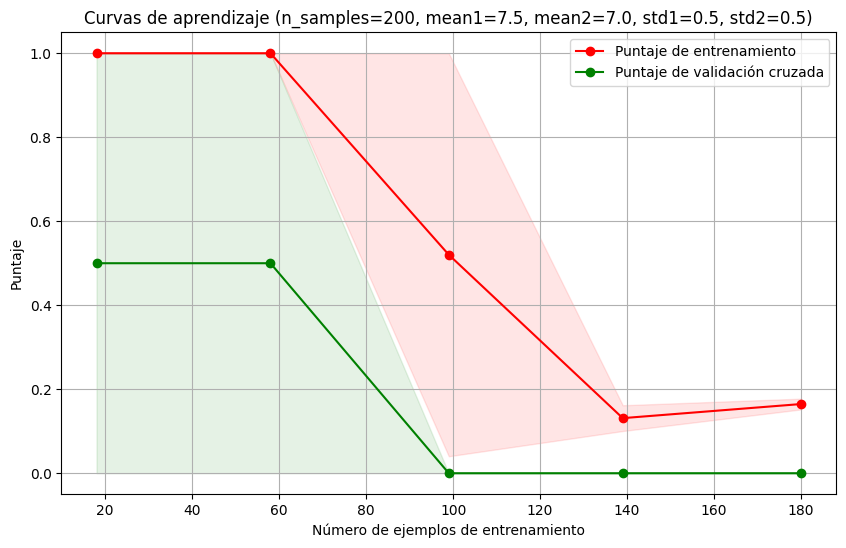

In [11]:
def generate_data(mean1, std1, mean2, std2, n_samples):
    samples1 = norm.rvs(loc=mean1, scale=std1, size=n_samples // 2)
    samples2 = norm.rvs(loc=mean2, scale=std2, size=n_samples // 2)
    
    X = np.concatenate([samples1, samples2]).reshape(-1, 1)
    y = np.concatenate([np.zeros(n_samples // 2), np.ones(n_samples // 2)])
    return X, y


def run_experiment_linear_regression(mean1, std1, mean2, std2, n_samples):
    X, y = generate_data(mean1, std1, mean2, std2, n_samples)
    
    regr = LinearRegression()
    
    title = f"Curvas de aprendizaje (n_samples={n_samples}, mean1={mean1}, mean2={mean2}, std1={std1}, std2={std2})"
    
    plot_learning_curve(regr, title, X, y, ylim=None, cv=10, n_jobs=1)

run_experiment_linear_regression(7.5, 1, 10, 1, 30)
run_experiment_linear_regression(7.5, 1, 10, 1, 100)
run_experiment_linear_regression(7.5, 2, 7.0, 2, 200)
run_experiment_linear_regression(7.5, 0.5, 7.0, 0.5, 200)

De cada prueba se puede concluir que este modelo tiene muy malos resultados sobre el conjunto de validación en todos los casos. Sim embargo el primer caso parece ser el que consigue el mejor puntaje en el conjunto de entrenamiento al menos. Para comparar con otro modelo, se repiten los mismos experimentos per con el DecisionTreeClassifier.

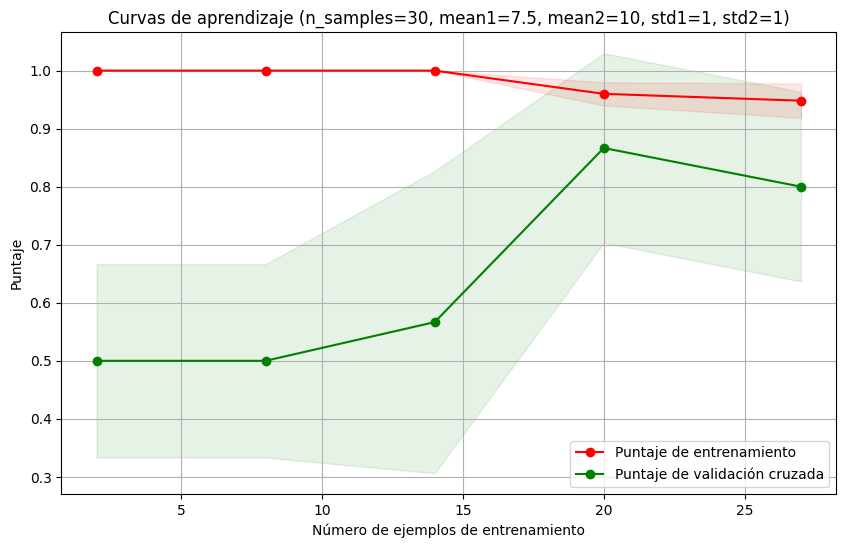

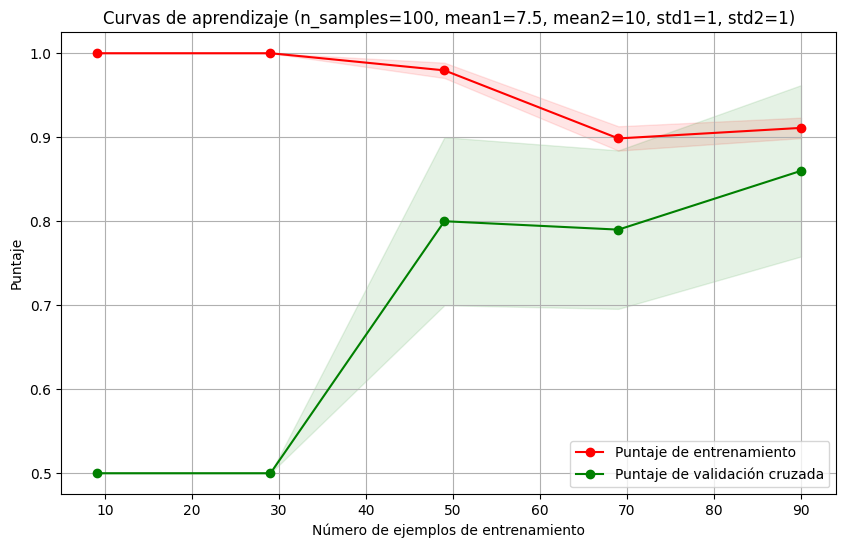

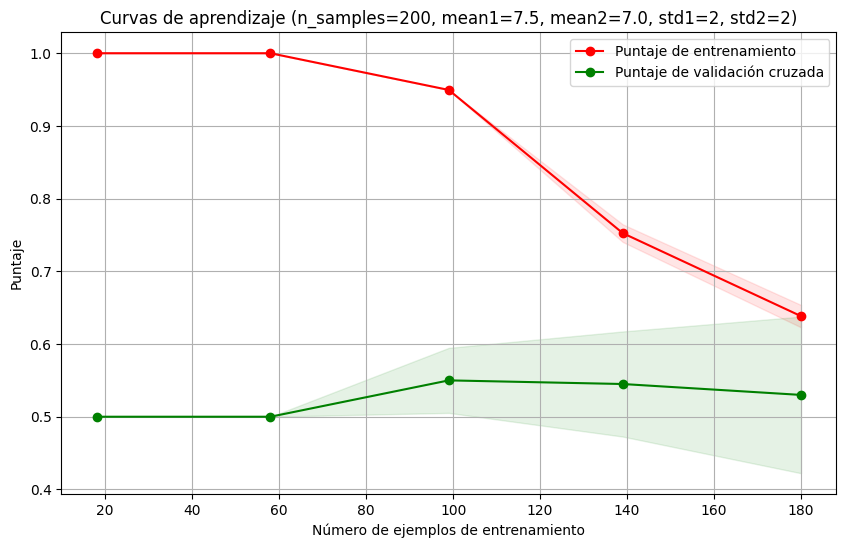

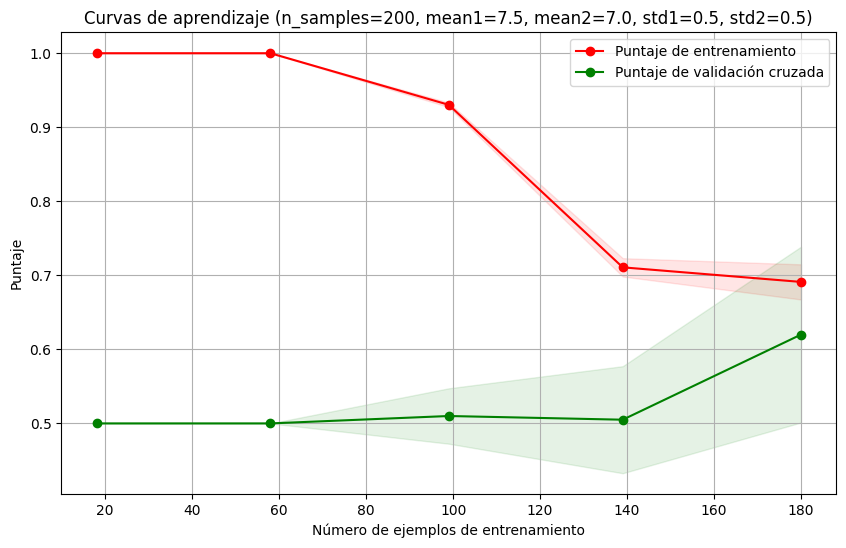

In [12]:
def run_experiment_decision_tree(mean1, std1, mean2, std2, n_samples):
    X, y = generate_data(mean1, std1, mean2, std2, n_samples)
    
    regr = DecisionTreeClassifier(max_depth=3)
    
    title = f"Curvas de aprendizaje (n_samples={n_samples}, mean1={mean1}, mean2={mean2}, std1={std1}, std2={std2})"
    
    plot_learning_curve(regr, title, X, y, ylim=None, cv=10, n_jobs=1)

run_experiment_decision_tree(7.5, 1, 10, 1, 30)
run_experiment_decision_tree(7.5, 1, 10, 1, 100)
run_experiment_decision_tree(7.5, 2, 7.0, 2, 200)
run_experiment_decision_tree(7.5, 0.5, 7.0, 0.5, 200)

Se puede ver que este modelo obtiene mejores puntajes de validación en todos los casos, demostrando que es un mejor modelo.